In [1]:
import numpy as np
import matplotlib.pyplot as plt

from constants import MU, BETA4
from mottmassey import mm_potential
import utility
import bind
import bound_states as bs

plt.style.use('science')

It's easier to get high-precision results from the coordinate-space methods, but we need to start with reasonable guesses for the binding energies. We'll do a quick momentum-space calculation to obtain these guesses.

In [2]:
R = 1.5
qmax = 10*2/R
q, wq = utility.log_mesh(0, qmax, 200)
r, wr = utility.log_mesh(0, 10*BETA4, 2000)

v_tilde = utility.ft_matrix_gen(mm_potential, 0, 0, q, r, wr)

In [10]:
spec_mm = bind.spectrum(v_tilde, 0, 0, q, wq)[::-1]
gamma_mm = np.sqrt(2*MU*-spec_mm)
r0_mm = -1/gamma_mm * np.log(1e-11)
r0_mm

array([  4.56419309,   5.52298913,   7.01598749,   9.59237563,
        14.85168553,  29.37677257, 105.93347418])

In [14]:
index = 0
r0 = r0_mm[index]
e2 = bs.bound_state(mm_potential, spec_mm[index], r0, endpts=[5e-5, 1.1*r0])

r0, e2, spec_mm[index]

(4.564193091104943, -0.06476101809868819, -0.0647609191295247)

In [15]:
for i in np.linspace(0.01, 0.0005, 10):
    print(
        i, bs.bound_state(mm_potential, spec_mm[index], r0, endpts=[i, 100])
    )

0.01 -0.06476101809868819
0.008944444444444444 -0.06476101809868819
0.00788888888888889 -0.06476101809868819
0.006833333333333334 -0.06476101809868819
0.005777777777777778 -0.06476101809868819
0.004722222222222223 -0.06476101809868819
0.003666666666666667 -0.06476101809868819
0.002611111111111112 -0.06476101809868819
0.0015555555555555566 -0.06476101809868819
0.0005 -0.06476101809868819


In [17]:
u1 = bs.normalized_wave_function(mm_potential, spec_mm[index], r0)
u2 = bs.normalized_wave_function(mm_potential, e2, r0)

r, wr = bs.normalization_r_mesh(r0)

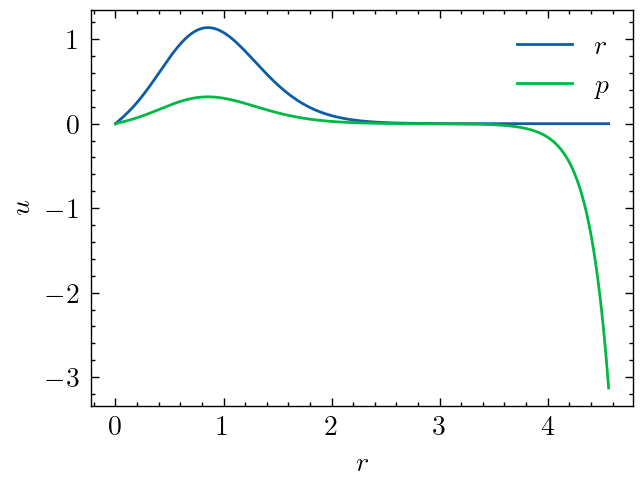

In [21]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')


ax.plot(r, u2, label=r'$r$')
ax.plot(r, u1, label=r'$p$')

ax.legend()
ax.set_xlabel(r'$r$')
ax.set_ylabel(r'$u$');

In [23]:
spec_mm_1 = np.array([])

for (en, r0) in zip(spec_mm, r0_mm):
    spec_mm_1 = np.append(spec_mm_1, bs.bound_state(mm_potential, en, r0))

In [24]:
for (x, y) in zip(spec_mm, spec_mm_1):
    print(f'{x:.8f}  {y:.8f}')

-0.06476092  -0.06476102
-0.04422753  -0.04422778
-0.02740712  -0.02740751
-0.01466185  -0.01466227
-0.00611631  -0.00611664
-0.00156327  -0.00156342
-0.00012022  -0.00012025


In [26]:
np.savetxt('datfiles/spectra/spectrum_Mott_Massey.txt', spec_mm_1)